# Tutorial Naive Bayes

In this notebook, we will try to classify planets identified by direct imaging method into two groups using Naive Bayes:
* based on thier mass - planets with mass <= 10 Jupiter mass in one and greater than 10 in another
* based on if they are present in a circumstellar disk or not

Later, we will make an attempt to classify them based on their spectral types.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
di = pd.read_csv('directimaging_2023.03.23_03.57.03.csv', sep=',', comment='#')

In [28]:
di_clean = di[['plntname', 'imsep', 'implmass', 'implradius', 'implstype', 'impltemp', 'implnjmag', 'implnhmag', 'implnkmag', 'implnlpmag', 'immass', 'imjmag', 'imlum', 'imstype', 'image', 'imdisk']]

In [29]:
di_clean['mass_flag'] = np.where((di_clean['implmass'] <= 10), '0', '1')

C:\Users\ridha\AppData\Local\Temp\ipykernel_15996\1362725897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  di_clean['mass_flag'] = np.where((di_clean['implmass'] <= 10), '0', '1')


In [30]:
di_clean['dis_flag'] = np.where((di_clean['imsep'] <= 100), '0', '1')

C:\Users\ridha\AppData\Local\Temp\ipykernel_15996\3145551809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  di_clean['dis_flag'] = np.where((di_clean['imsep'] <= 100), '0', '1')


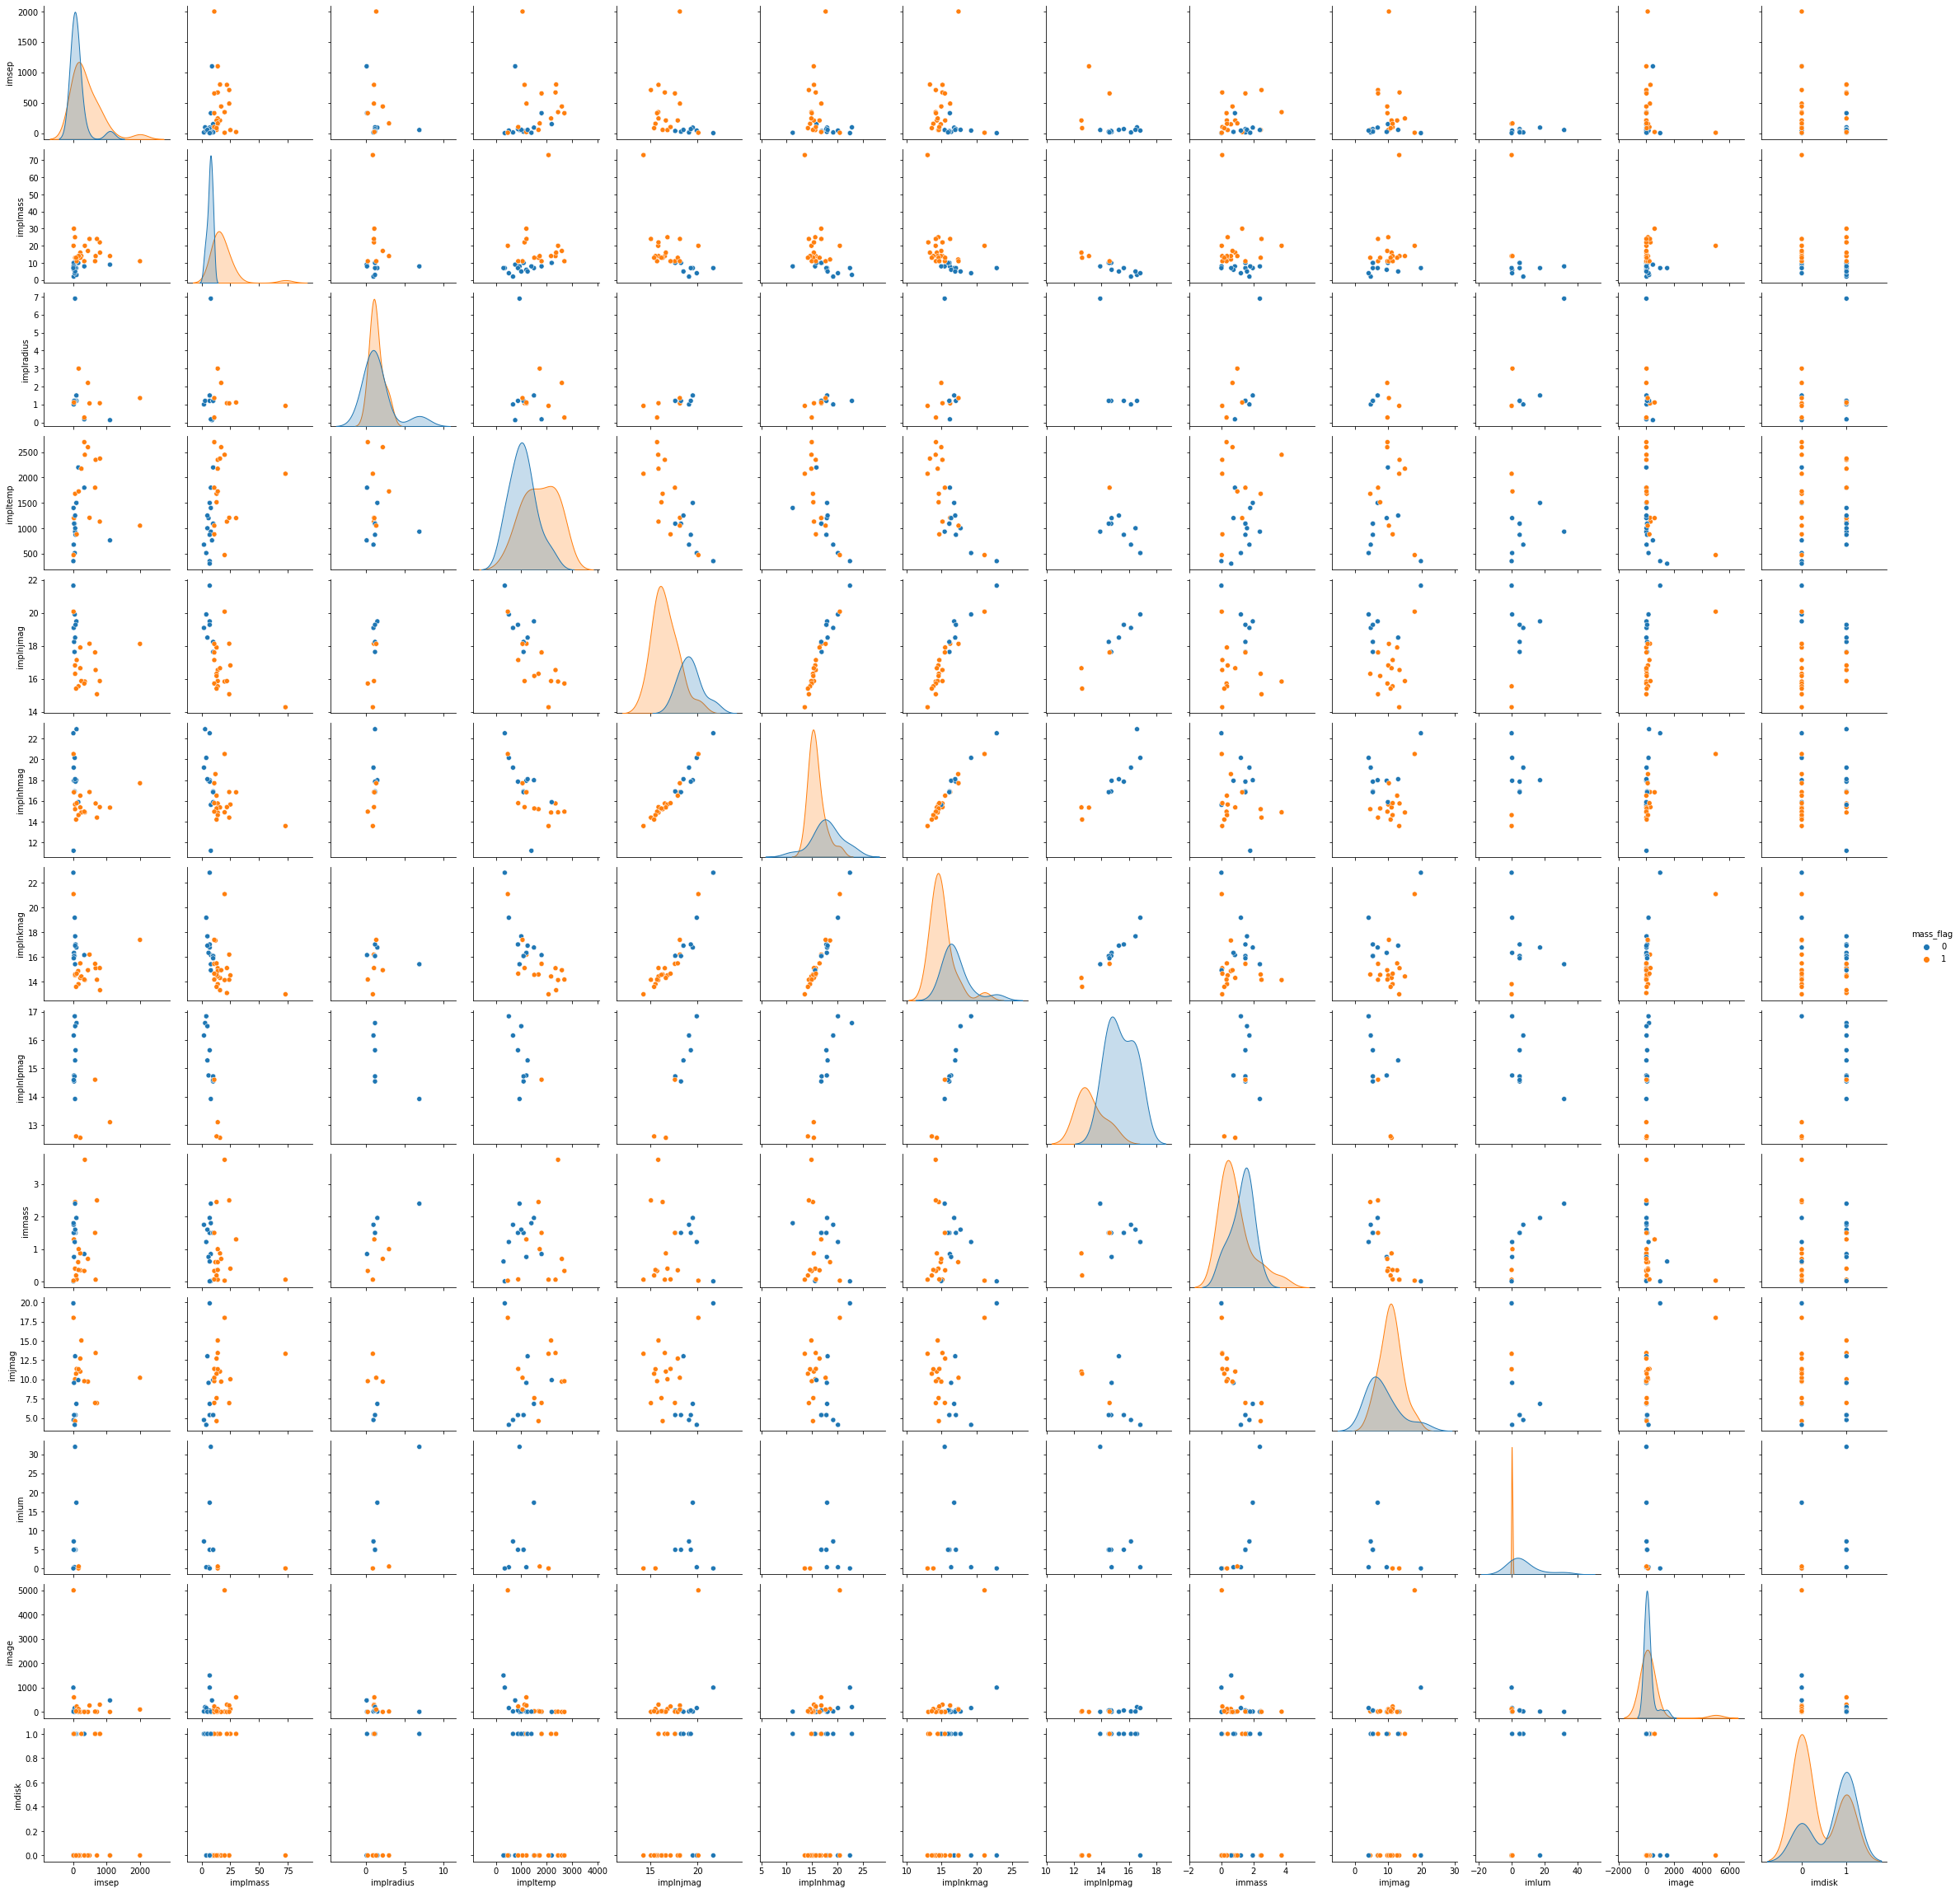

In [61]:
sns.pairplot(di_clean, hue = 'mass_flag')

In [90]:
## Simple Naive Bayes

C:\Users\ridha\AppData\Local\Temp\ipykernel_15996\1189313978.py:4: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=mass_flag_0['immass'], y=mass_flag_0['implnjmag'],
C:\Users\ridha\AppData\Local\Temp\ipykernel_15996\1189313978.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=mass_flag_0['immass'], y=mass_flag_0['implnjmag'],


<AxesSubplot:xlabel='immass', ylabel='implnjmag'>

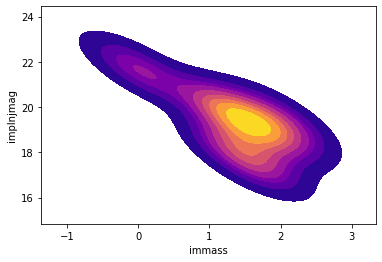

In [31]:
mass_flag_0 = di_clean[di_clean['mass_flag'] == '0']


sns.kdeplot(x=mass_flag_0['immass'], y=mass_flag_0['implnjmag'], 
            cmap='plasma', shade=True, shade_lowest=False)

C:\Users\ridha\AppData\Local\Temp\ipykernel_15996\2595824962.py:4: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=mass_flag_1['immass'], y=mass_flag_1['implnjmag'],
C:\Users\ridha\AppData\Local\Temp\ipykernel_15996\2595824962.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=mass_flag_1['immass'], y=mass_flag_1['implnjmag'],


<AxesSubplot:xlabel='immass', ylabel='implnjmag'>

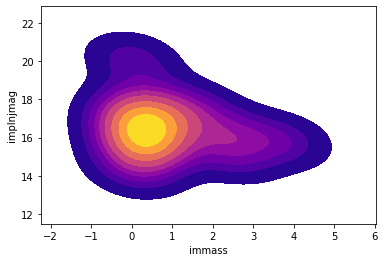

In [32]:
mass_flag_1 = di_clean[di_clean['mass_flag'] == '1']


sns.kdeplot(x=mass_flag_1['immass'], y=mass_flag_1['implnjmag'], 
            cmap='plasma', shade=True, shade_lowest=False)

In [78]:
di_train = di_clean[['implnjmag', 'immass', 'mass_flag']]
di_train = di_train.dropna()

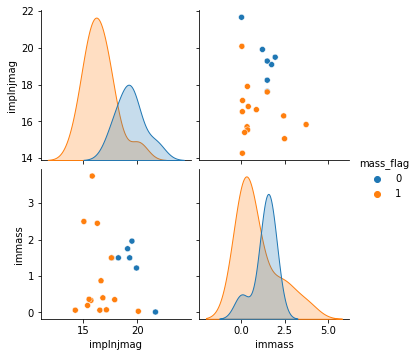

In [79]:
sns.pairplot(di_train, hue = 'mass_flag')

In [80]:
from sklearn.model_selection import train_test_split
X = di_train.drop('mass_flag', axis = 1)
y = di_train['mass_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [81]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [82]:
y_pred = model.predict(X_test)

(-0.11450000000000002, 2.6245, 13.9005, 22.0295)

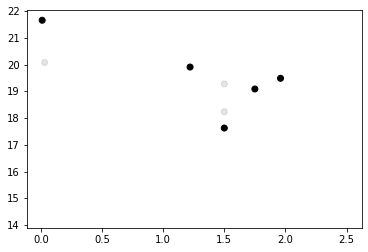

In [83]:
plt.scatter(X_train['immass'], X_train['implnjmag'], c=y_train)
lim = plt.axis()
plt.scatter(X_test['immass'], X_test['implnjmag'], c=y_pred, alpha=0.1)
plt.axis(lim)

In [84]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[2 0]
 [1 4]]


Text(91.68, 0.5, 'predicted label')

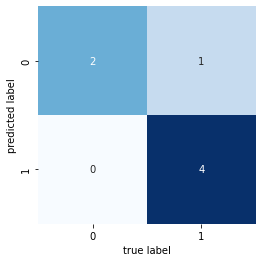

In [89]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap=plt.cm.Blues,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label')

## Multinomial Naive Bayes